In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [2]:
def E(y, predictions):
    return np.sum(np.not_equal(y, predictions)) / len(y)

In [3]:
# Load training text file
Data_train = np.loadtxt('training_data.txt', skiprows = 1)
X_train = Data_train[0:20000, 1:]
y_train = Data_train[0:20000, 0]
X_test = np.loadtxt('test_data.txt', skiprows = 1)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (20000, 1000)
y_train shape: (20000,)


In [4]:
# Normalize training data
for i in range(len(X_train[0])):
    col = X_train[:, i]
    mean = np.mean(col)
    std = np.std(col)
    X_train[:, i] = (col - mean) / std
    X_test[:, i] = (X_test[:,i] - mean) / std
    
print('normalized')

normalized


In [5]:
tuned_parameters = {'kernel': ['rbf'], 'C': [0.1, 1, 10]}
clf = GridSearchCV(SVC(), tuned_parameters, scoring = 'accuracy')
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_params_)

0.84705
{'C': 1, 'kernel': 'rbf'}


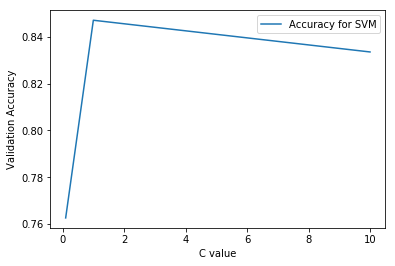

In [8]:
import matplotlib.pyplot as plt
E_vals = clf.cv_results_['mean_test_score']

plt.plot([0.1, 1, 10], E_vals, label = "Accuracy for SVM")
plt.xlabel("C value")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
# Actual training and making predictions


pred = clf.predict(X_test)
submission = [[i+1, int(pred[i])] for i in range(len(pred))]
submission.insert(0, ['Id','Prediction'])
with open('submission_svm.csv', 'w') as f:
    for line in submission:
        f.write(','.join(map(str, line)) + '\n')